# SUPERMARKET SALES ANALYSIS

# AIMS & OBJECTIVES OF THIS PROJECT
* Which are the Top product_line by Total sales?
* Which are the most selling product_line?
* Which are the most preferred payment mode?
* The most preferred means of payment for Each gender.
* Which Gender spend more cash on product_line.
* Top rated product_line.


# All visuals are respectively shown on "Dashboard"  using Power BI




# Importing Required Libraries for this Notebook.

In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset

In [8]:
df = pd.read_csv(r'C:\Users\User\Desktop\Data analytics s\SUPERMARKET SALES ANALYSIS\supermarket_sales - Sheet1 (1).csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


# Data cleaning(wrangling the data)

In [28]:
# checking the first 5 rows in the dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost_of_goods_sold,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-19,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [44]:
# checking the last 5 rows in the dataset
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,1:28:00 PM,Cash,618.38,4.761905,30.9190,6.6


In [45]:
# Shape of the dataset
df.shape

(1000, 17)

In [46]:
# Columns present in the dataset
df.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [47]:
# A summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [48]:
# checking for missing data in every column
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

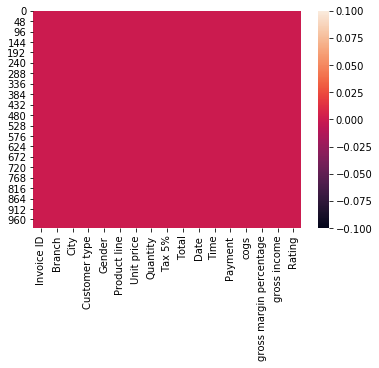

In [49]:
# Visualization for missing value using heatMaps

sns.heatmap(df.isnull())

In [51]:
# Checking for the duplicated value

df.duplicated().sum()


0

In [52]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [53]:
# Checking correlations within variables

df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-6.998957e-16,6.339621e-01,-8.777507e-03
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-3.849075e-16,7.055102e-01,-1.581490e-02
Tax 5%,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02
cogs,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02
gross margin percentage,-6.998957e-16,-3.849075e-16,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15
gross income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00


In [89]:
# Renaming "cogs" column to "cost of goods sold"
df.rename (columns = {'cogs':'cost of goods sold'},inplace = True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost of goods sold,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [90]:
# Dropping all uncessary columns that would not be needed for Exploratory data analysis based on the objectives
# Examples of such columns includes
# * Invoice ID         
# * Branch              
# * Gross income
# * Gross margin percentage
df.drop(['Branch','Invoice ID','gross margin percentage','gross income'], axis='columns', inplace=True)
df


,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost of goods sold,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,5:16:00 PM,Ewallet,973.80,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,1:22:00 PM,Cash,31.84,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.1


# EXPLORATORY DATA  ANALYSIS


* Which are the Top product_line by Total sales?
* Which are the most selling product_line?
* Which are the most preferred payment mode?
* The most preferred means of payment for Each gender.
* Which Gender spend more cash on product_line.
* Top 10 rated prouct_line.



# Which are the Top product_line by Total sales?

In [169]:
# Grouping DATA by Product line
top_product = pd.DataFrame(df.groupby('Product line').sum()['Total'])

# Sorting the dataframe in descending order
top_product.sort_values(by=['Total'], inplace=True, ascending=False)

# Top products by Total sales
top_product[:]

,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


In conclusion: From the analysis above it has been shown that "Food and beverages" has the highest Total sales of $56144

# Which are the most selling product_line?

In [166]:
# Grouping DATA by  product line
top_product_line = pd.DataFrame(df.groupby('Product line').sum()['Quantity'])

# Sorting the dataframe in descending order
top_product_line.sort_values(by=['Quantity'], inplace=True, ascending=False)

# Top products by Quantity
top_product_line[:]

,Quantity
Product line,
Electronic accessories,971
Food and beverages,952
Sports and travel,920
Home and lifestyle,911
Fashion accessories,902
Health and beauty,854


In conclusion: From the analysis above it has been shown that "Electronic accessories" is the most selling product line with "Total Quantity" of 971 product sold

# Which are the most preferred payment mode?

In [167]:
# Grouping DATA by  Payment mode
preferred_payment = pd.DataFrame(df.groupby('Payment').sum()['Total'])

# Sorting the dataframe in descending order
preferred_payment.sort_values(by=['Total'], inplace=True, ascending=False)

# Top products by Payment
preferred_payment[:]

,Total
Payment,
Cash,112206.570
Ewallet,109993.107
Credit card,100767.072


In conclusion: From the analysis above it has been shown that the "most preferred payment mode" is cash with a sum "Total" of $112206

# The most preferred means of payment for Each gender.

In [168]:
# Grouping DATA by gender and payment
gender_payment_mode = pd.DataFrame(df.groupby(['Gender', 'Payment']).sum()['Total'])

# Sorting the values based on gender and Total
gender_payment_mode.sort_values(['Gender','Total'], ascending=False)

Total
Gender Payment               
Male   Ewallet      55122.837
       Cash         52692.360
       Credit card  47268.627
Female Cash         59514.210
       Ewallet      54870.270
       Credit card  53498.445

In conclusion: From the analysis above it has been shown that "Male" tends to pay for their product using "Ewallet" with a sum "Total" of $55122  and

"Female" tends to pay for their product using "Cash" with a sum "Total" of $59514


i.e "Male" practice cashless policy more than "Female"

# Which Gender spend more cash on product_line.

In [161]:
# Grouping DATA by gender
top_spender = pd.DataFrame(df.groupby(['Gender']).sum()['Total'])

# Sorting the dataframe in descending order
top_spender.sort_values(by=['Total'], inplace=True, ascending=False)

# Total spent by Gender
top_spender[:]

,Total
Gender,
Female,167882.925
Male,155083.824


In conclusion: From the analysis above it has been shown that "Female" spend more on product line with a sum "Total" of $167882

# Top rated product_line.

In [130]:
# Grouping DATA by product line
top_rated_product = pd.DataFrame(df.groupby('Product line').mean()['Rating'])

# Sorting the dataframe in descending order
top_rated_product.sort_values(by=['Rating'], inplace=True, ascending=False)

# Top rated products
top_rated_product[:]

,Rating
Product line,
Food and beverages,7.113218
Fashion accessories,7.029213
Health and beauty,7.003289
Electronic accessories,6.924706
Sports and travel,6.916265
Home and lifestyle,6.837500


In conclusion: From the analysis above it has been shown that "Food and beverages" is the Top rated Product line with "Ratings" of 7.1


# All visuals are respectively shown on "Dashboard" using Power BI


 Github link for this project here: